# Exploratory Data Analysis (EDA) on the Iris Dataset

## Background

The Iris dataset is one of the most famous datasets used for practicing data analysis and machine learning. It contains measurements of iris flowers of three different species. The dataset includes features like sepal length, sepal width, petal length, and petal width. This exercise focuses on exploring this dataset to find patterns and insights.

## Dataset Overview

The Iris dataset typically includes the following columns:

- SepalLengthCm: Length of the sepal in centimeters.
- SepalWidthCm: Width of the sepal in centimeters.
- PetalLengthCm: Length of the petal in centimeters.
- PetalWidthCm: Width of the petal in centimeters.
- Species: Species of the iris flower (Setosa, Versicolour, Virginica).


## 1. Data Loading
Load the Iris dataset into a DataFrame using a data analysis library like pandas in Python.

In [11]:
import pandas as pd # for data manipulation
from sklearn.datasets import load_iris # load the iris dataset

import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for advanced plotting

In [12]:
# set df to the iris dataset
df = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names)

In [13]:
# Add the species column to the DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add the target values as a new column
df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})  # Map target values to species names

## 2. Data Inspection

- Use methods like .head(), .info(), and .describe() to get an overview of the dataset.
- Identify the unique species present in the dataset and their distribution.

In [14]:
# check the first 5 rows of the dataset
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
# describe the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3. Data Visualization

- Visualize the distribution of each feature (sepal length, sepal width, petal length, petal width) using histograms.
- Create scatter plots to explore the relationships between each pair of features.

<Figure size 1200x800 with 0 Axes>

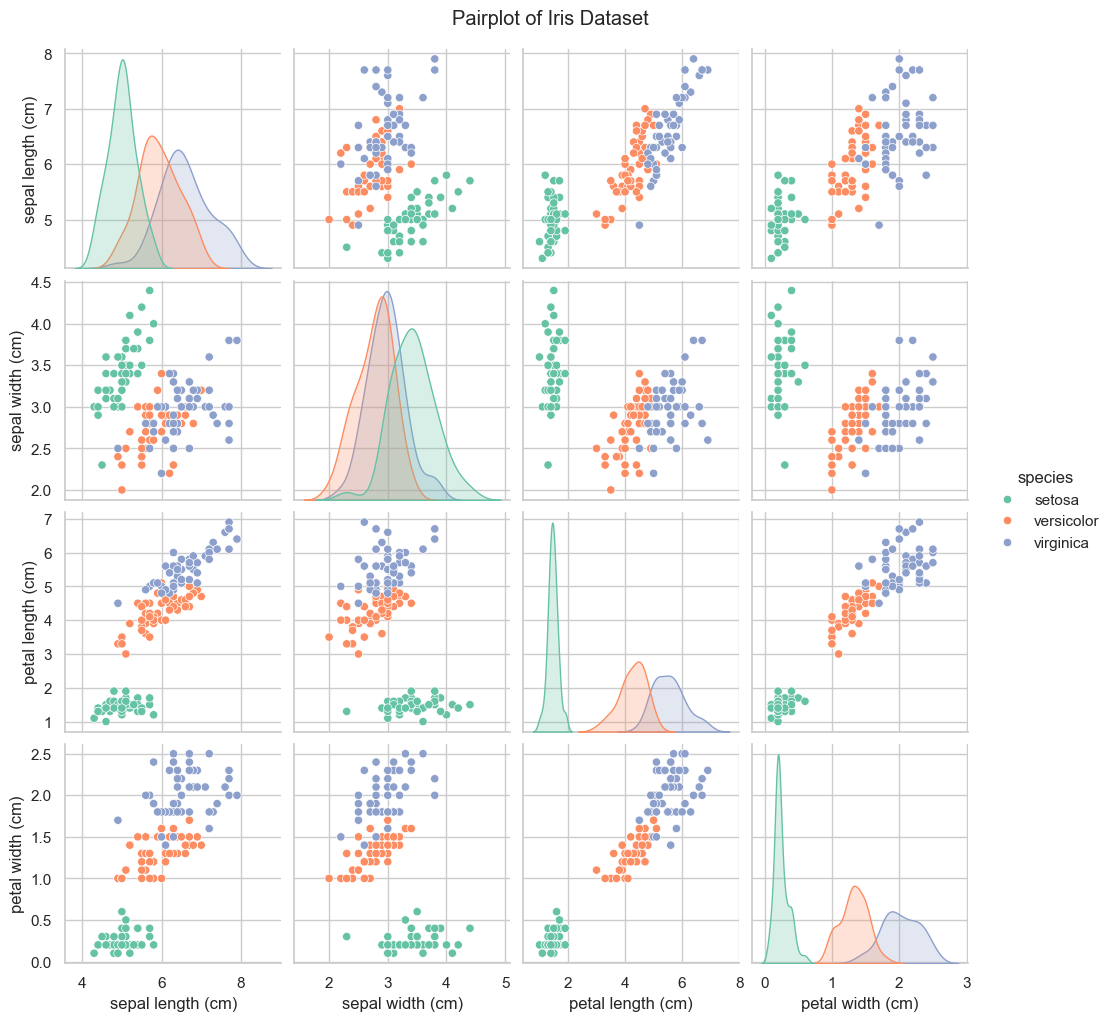

In [17]:
# visualize the distribution of the features of the iris dataset
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.pairplot(df, diag_kind='kde', markers='o', hue='species', palette='Set2')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


For the three species in general, sepal width sepal with and length present some linearity; suggesting some proportionality in the area.
Versicolor and virginica present similar behaviour, presenting some linearity between sepal width and petal length, sepal width and petal width.
Setosa is the shortest sepal and with smallest petals, although it has the widest sepals.

## 4. Exploratory Analysis

- Univariate Analysis: Assess the distribution of each feature for different iris species.
- Bivariate Analysis: Investigate the relationships between pairs of features for each species.
- Multivariate Analysis: Explore complex relationships involving all features and species.

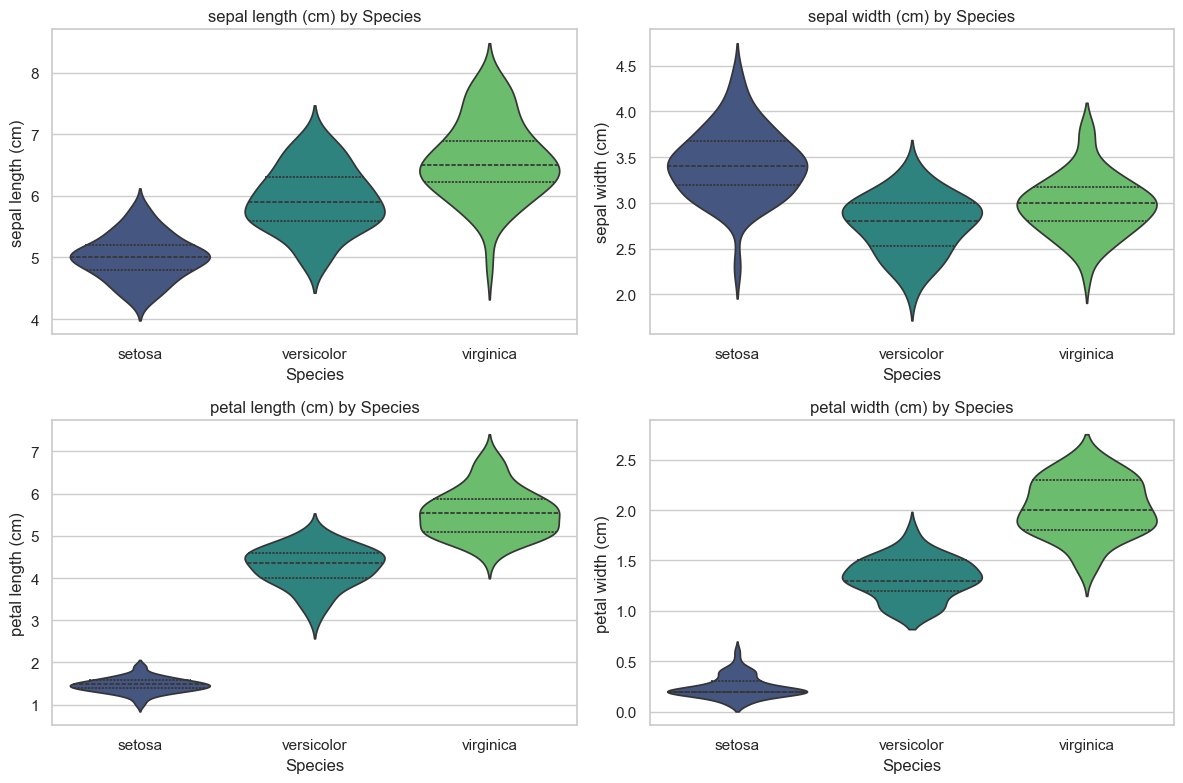

In [20]:
# univariate analysis of the features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df, inner='quartile', palette='viridis', hue='species')
    plt.xlabel('Species')
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

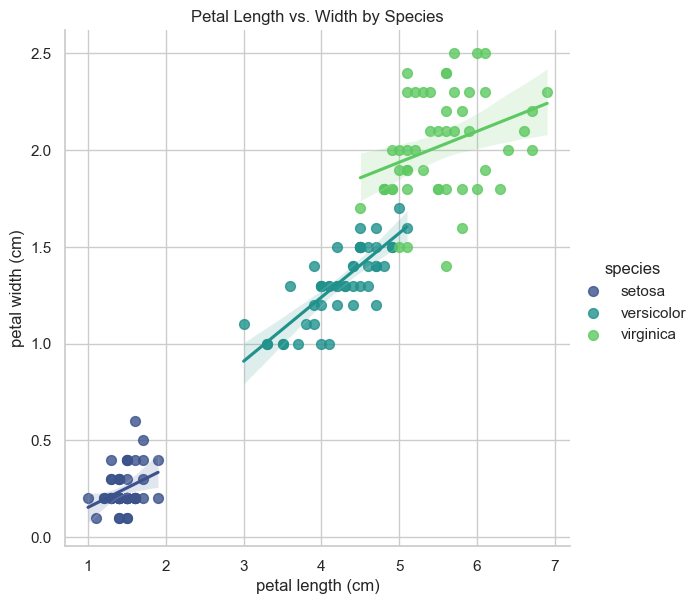

In [22]:
# Bivariate Analysis: Pairwise Feature Relationships
# Goal: Identify how pairs of features correlate within each species

# Custom scatter plot with regression
g = sns.lmplot(
    data=df, x='petal length (cm)', y='petal width (cm)', 
    hue='species', palette='viridis', height=6, 
    scatter_kws={'s': 50, 'alpha': 0.8}
)
g.set(title="Petal Length vs. Width by Species")
plt.show()


Versicolor and virginica present some linearity between petal width and length, setosa doesn't.

<Figure size 1000x600 with 0 Axes>

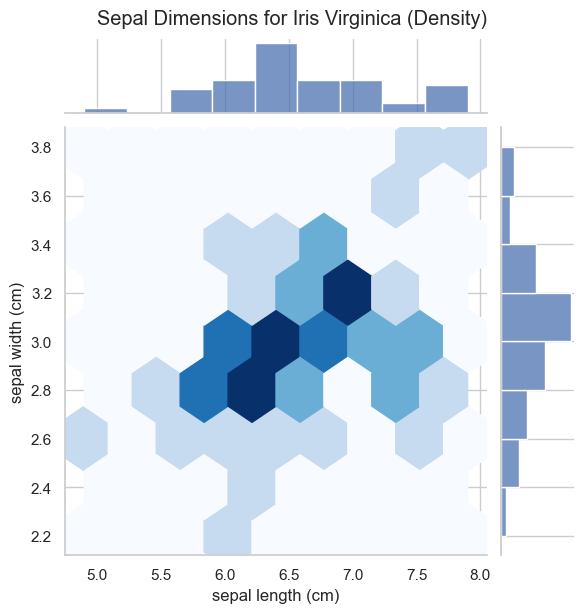

In [24]:
# hexbin plot
plt.figure(figsize=(10, 6))
sns.jointplot(
    data=df[df['species'] == 'virginica'],
    x='sepal length (cm)', y='sepal width (cm)',
    kind='hex', cmap='Blues'
)
plt.suptitle("Sepal Dimensions for Iris Virginica (Density)", y=1.02)
plt.show()

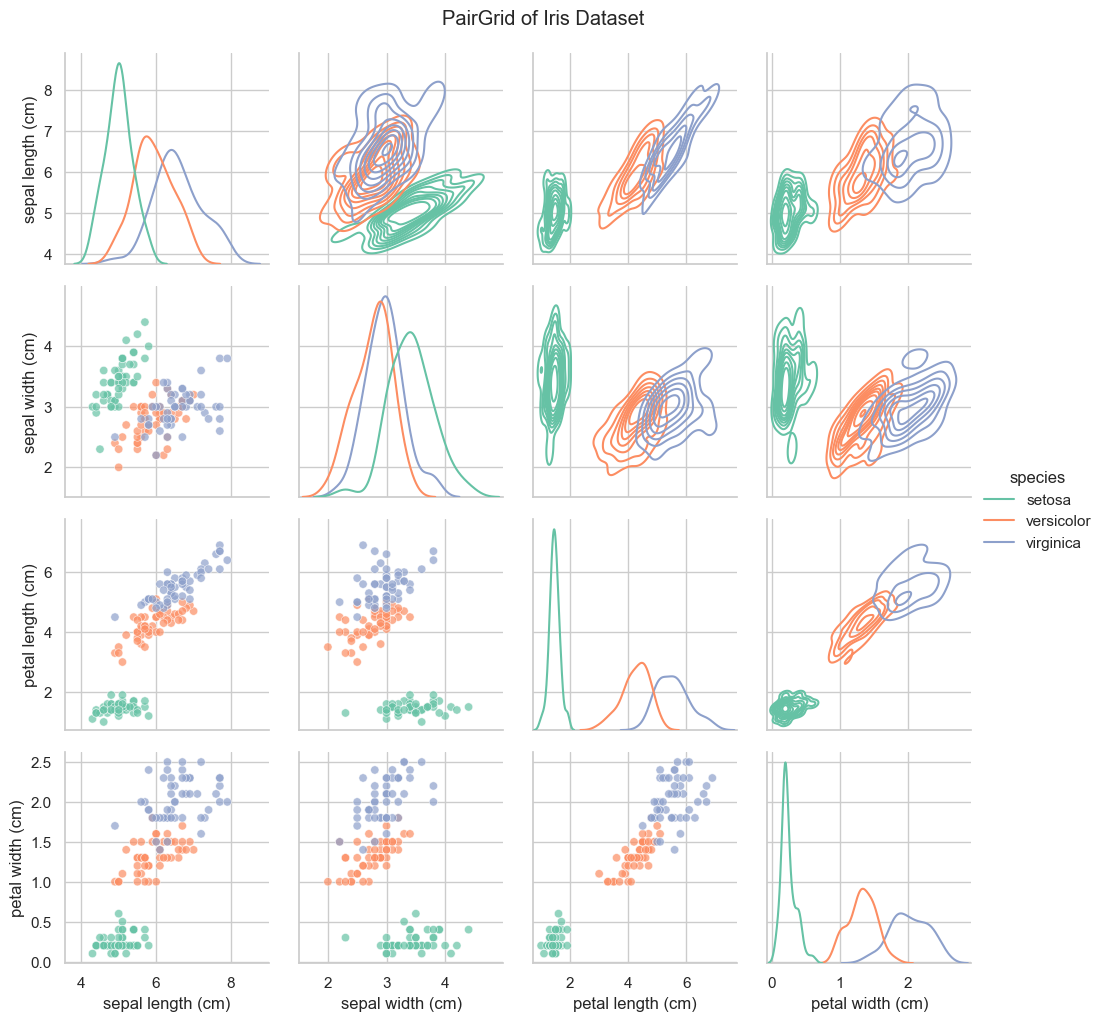

In [26]:
# Multivariate Analysis: All Features + Species
# Goal: Visualize interactions between ≥3 variables.
fig = sns.PairGrid(
    df, hue='species', palette='Set2', diag_sharey=False, height=2.5
)
fig.map_lower(sns.scatterplot, alpha=0.7)
fig.map_diag(sns.kdeplot)
fig.map_upper(sns.kdeplot)
fig.add_legend()
plt.suptitle("PairGrid of Iris Dataset", y=1.02)
plt.show()

## 5. Insight Generation

- Identify key characteristics that differentiate each iris species based on the flower measurements.
- Highlight any interesting patterns or anomalies discovered during the analysis.

## 6. Advanced Visualization

- Use boxplots to compare the distribution of features across different species.
- Create pair plots or heatmaps to visualize the correlation between all features.

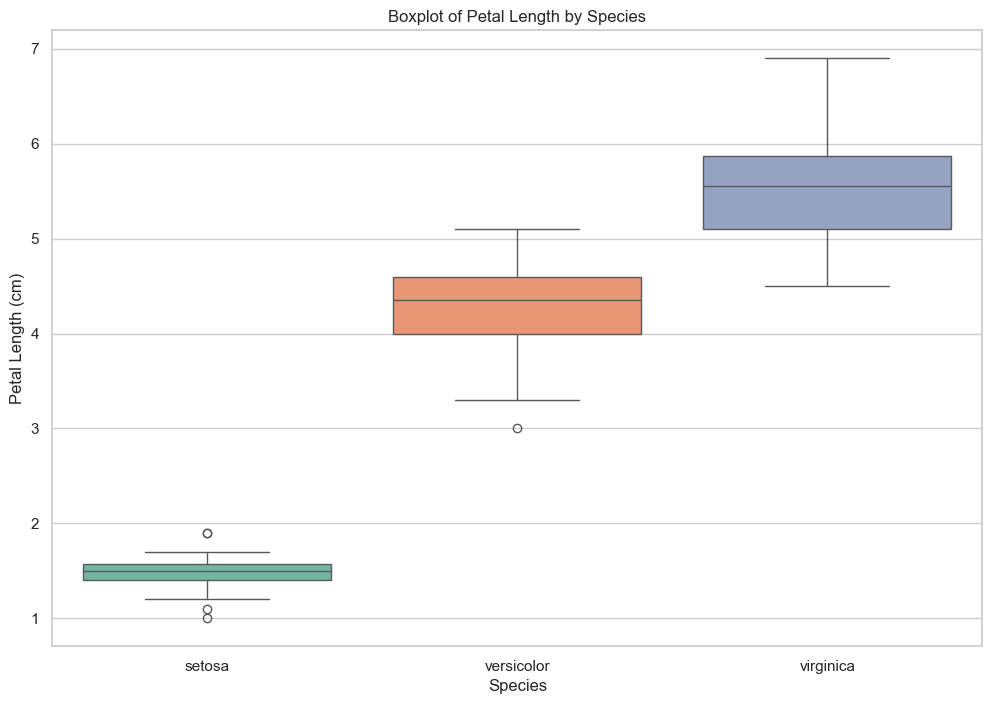

In [29]:
# boxplot to compare the distribution of features across species
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='petal length (cm)', hue='species', palette='Set2', dodge=False, legend=False)
plt.title('Boxplot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

Setosa has the shortest petals and presents less dispersion (both for IQR and outliers) than the others.

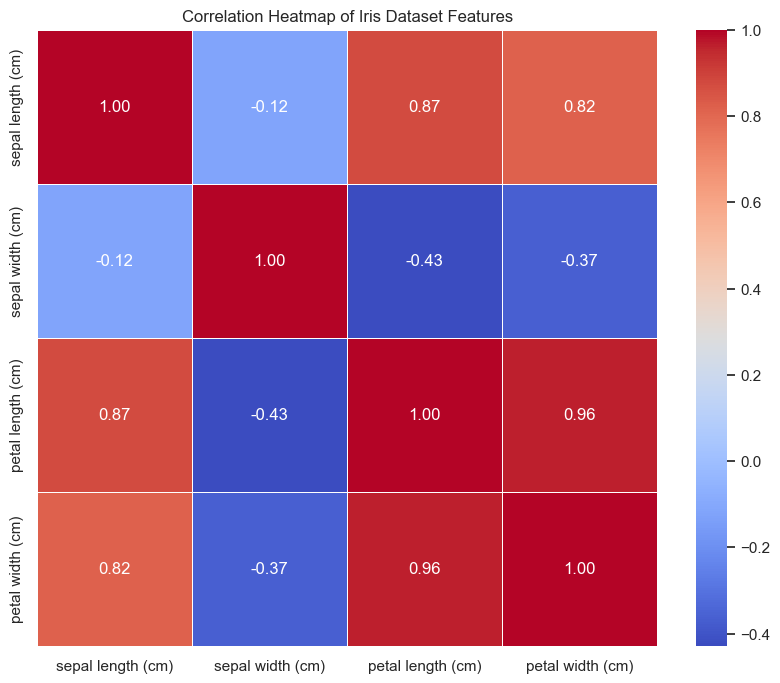

In [32]:
# heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

Strong correlation of sepal length with petal length and petal width.
The sepal width presents negative correlation with the petal lentgh and width.